In [1]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from wavhandler import *
from utils import *

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

In [2]:
df_mosquitos = pd.read_csv(TEMP_DATADIR + 'mosquitos.csv', delimiter=';')

# Creating dataframes that contain PSDs for each insect class

In [3]:
#bi_classes = ['LG_drosophila_10_09', 'LG_zapr_26_09']
#target_names = all_6
# /home/kalfasyan/data/insects/LG2
# '/home/kalfasyan/data/insects/increasing dataset/'

DATADIR = '/home/kalfasyan/data/insects/Wingbeats/'
target_names = os.listdir(DATADIR)
print(target_names)

X_names, y = get_data(filedir= DATADIR,
                      target_names=target_names, nr_signals=np.inf, only_names=True)

  0%|          | 0/6 [00:00<?, ?it/s]

['An. arabiensis', 'Ae. aegypti', 'An. gambiae', 'C. pipiens', 'Ae. albopictus', 'C. quinquefasciatus']


100%|██████████| 6/6 [00:01<00:00,  4.80it/s]


In [ ]:
%%time
X = make_df_parallel(names=X_names, setting='melbank')

In [5]:
df_concat = pd.DataFrame(X.T)
df_concat['label'] = y
print(df_concat.label.value_counts())

1    85553
5    74599
2    49471
3    30415
4    20231
0    19297
Name: label, dtype: int64


In [6]:
# df_concat = df_concat[df_concat.label.isin([0,1,2,3])]
df_concat = df_concat.sample(11000)

In [7]:
X = df_concat.iloc[:,:-1].values
y = df_concat.label.values

### Example PSD

In [8]:
# plt.plot(X[np.random.randint(0,X.shape[0]),:])

# Linear Discriminant Analysis (short)

EXPLAINED VARIANCE with 3 components: 0.93


Text(0, 0.5, 'component 2')

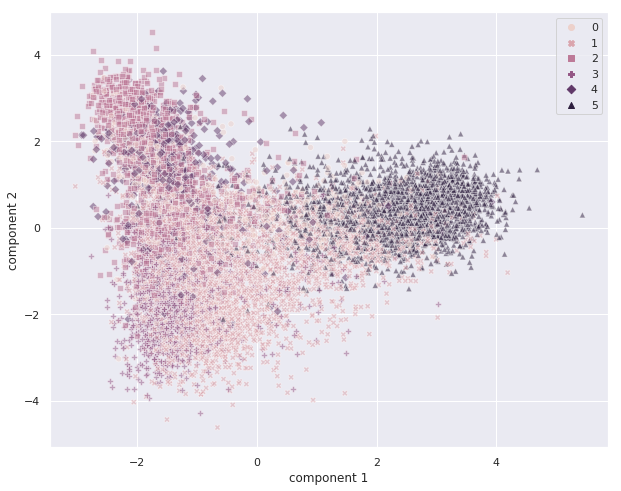

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler(with_std=False).fit_transform(X);  # standardization of data

ncomps = 3
lda = LDA(n_components=ncomps) # 10 to get 80% explained variance
Χ_final = lda.fit_transform(X_std,y)
print("EXPLAINED VARIANCE with {0:d} components: {1:.2f}".format(ncomps,lda.explained_variance_ratio_.sum()) )

plt.figure(figsize=(10,8))
sns.scatterplot(Χ_final[:,0], Χ_final[:,1], hue=y, style=y, alpha=0.5, legend='full')
plt.xlabel('component 1')
plt.ylabel('component 2')

# 3D Plot (PCA scores, 3 components)

In [124]:
import plotly
import plotly.plotly as py
from sklearn.preprocessing import LabelEncoder
plotly.tools.set_credentials_file(username='kalfasyan', api_key='oOr9ILFmszXQYREloJTp')

import plotly.graph_objs as go

import numpy as np

x, y, z = Χ_final[:,0], Χ_final[:,1], Χ_final[:,2]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',#LabelEncoder().fit(target_names).transform(df_concat.label.tolist()),#
            colorscale='Portland',
            width=0.5
        ),
        opacity=0.9
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

/home/kalfasyan/miniconda3/envs/wingbeats/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [92]:
Χ_final.shape

(5000, 2)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(Χ_final)


import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='kalfasyan', api_key='oOr9ILFmszXQYREloJTp')

import plotly.graph_objs as go

import numpy as np

x, y, z = Χ_final[:,0], Χ_final[:,1], Χ_final[:,2]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1,
        line=dict(
            color=kmeans.labels_,#'rgba(217, 217, 217, 0.14)',
            colorscale='Viridis',
            width=0.5
        ),
        opacity=0.9
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

In [ ]:
df_an = df_an.transpose()
df_an.shape

In [ ]:
df_an['kmeans'] = kmeans.labels_

In [ ]:
df_an.sample(10)

In [ ]:
import pickle

def save_obj(obj, name ):
    with open('./data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(df_an['kmeans'].to_dict(), 'df_an_clusters')